### Chap3 Algorithm Analysis

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from typing import List, TypeVar
Num = TypeVar('Num', int, float)

#### Reinforcement

##### R-3.1
Graph the functions $8n$, $4n\log n$, $2n^2$ , $n^3$ , and $2^n$ using a logarithmic scale
for the x- and y-axes; that is, if the function value $f(n)$ is y, plot this as a
point with x-coordinate at log n and y-coordinate at log y.

In [2]:
def plot_loglog():
    xs = range(1, 100)
    plt.loglog(xs, [8*x for x in xs], basex=2, basey=2)
    plt.loglog(xs, [4*x*np.log2(x) for x in xs], basex=2, basey=2)
    plt.loglog(xs, [2*(x**2) for x in xs], basex=2, basey=2)
    plt.loglog(xs, [x**3 for x in xs], basex=2, basey=2)
    plt.loglog(xs, [2**x for x in xs], basex=2, basey=2)
    plt.legend(['$8n$', '$4n\\logn$', '$2n^2$', '$n^3$', '2^n'])
    plt.show()

fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plot_loglog()

##### R-3.2
The number of operations executed by algorithms A and B is $8n\log n$ and
$2n^2$ , respectively. Determine $n_{0}$ such that A is better than B for $n ≥ n_0$ .

solution:
$$8n\log n = 2n^2$$
$$4\log n = n$$
$$n_0 = 16$$

##### R-3.3
The number of operations executed by algorithms A and B is $40n^2$ and
$2n^3$ , respectively. Determine $n_0$ such that A is better than B for $n ≥ n_0$ .

solution:
$$2n^3 = 40n^2$$
$$n_0 = 20$$

##### R-3.4 
Give an example of a function that is plotted the same on a log-log scale
as it is on a standard scale.

solution: Constant Function.

##### R-3.5 
Explain why the plot of the function $n^c$ is a straight line with slope $c$ on a
log-log scale.

solution:
$$y = n^c$$
$$\log y = c \cdot \log n$$
$$y^\prime = c \cdot x^\prime$$
$$where, y^\prime = \log y, x^\prime = \log x$$

##### R-3.6
What is the sum of all the even numbers from $0$ to $2n$, for any positive
integer $n$?

solution:
$$0 + 2 + 4 + \cdots + 2n = 2 \cdot (1 + 2 + \cdots + n)  = n(n+1)$$

##### R-3.8
Order the following functions by asymptotic growth rate.

$$2^{10} < 3n+100\log n < 4n < n\log n < 4n\log n+2n < n^2 + 10n < n^3 < 2^{\log n} < 2 ^ n$$

##### # R-3.23 -> R-3.26
计算下面示例代码的时间复杂度.注意下面的`count`或`num_calc`是为后面可视化而自行添加的. 

In [3]:
def example1(S):
    """Return the sum of the elements in sequence S."""
    n = len(S)
    total = 0
    count = 0
    for j in range(n):
        total += S[j]
        count += 1
    return total, count

def example2(S):
    """Return the sum of the elemnets in sequnce S."""
    n = len(S)
    total = 0
    count = 0
    for j in range(0, n, 2):
        total += S[j]
        count += 1
    return total, count

def example3(S):
    """Return the sum of the elemnets in sequnce S."""
    n = len(S)
    total = 0
    count = 0
    for j in range(n):
        for k in range(1+j):
            total += S[j]
            count += 1
    return total, count

def example4(S):
    """Return the sum of the elemnets in sequnce S."""
    n = len(S)
    prefix = 0
    total = 0
    count = 0
    for j in range(n):
        prefix += S[j]
        total += prefix
        count += 1
    return total, count

def example5(A, B):
    n = len(A)
    count = 0
    num_calc = 0
    for i in range(n):
        total = 0
        for j in range(n):
            for k in range(1+j):
                total += A[k]
                num_calc += 1
        if B[i] == total:
            count+=1
    return count, num_calc

首先我们分析前面四段代码的复杂度,为了进行可视化,我们定义下面的函数:

In [4]:
def get_time_complexity_1(n, func):
    op_nums = []
    for i in range(1, n):
        A = np.random.randint(0, 100, size=(i, ))
        _, num_calc = func(A)
        op_nums.append(num_calc)
    fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(op_nums)
    plt.title(func.__name__)
    plt.show()

###### `example1`的时间复杂度为$O(n)

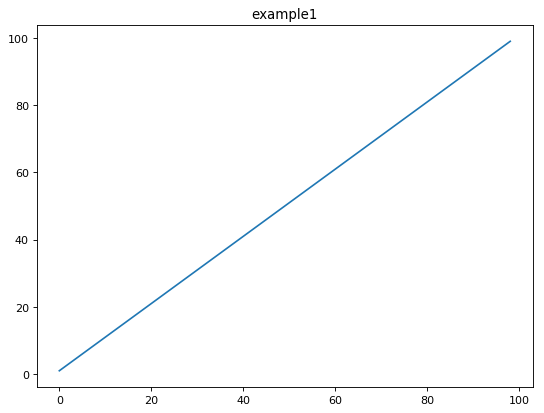

In [5]:
get_time_complexity_1(100, example1)

###### `example2`的时间复杂度为$O(n)

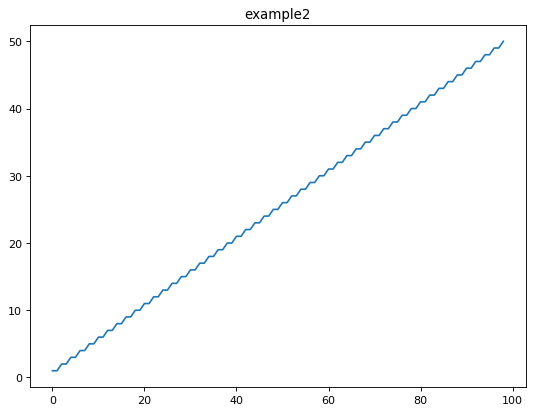

In [6]:
get_time_complexity_1(100, example2)

###### `example3`的时间复杂度为$O(n)$

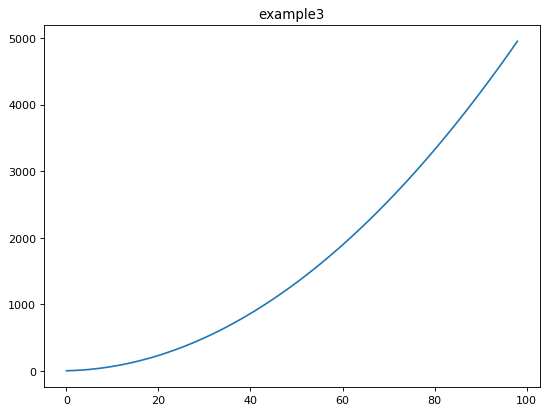

In [7]:
get_time_complexity_1(100, example3)

###### example4的时间复杂度为$O(n)$

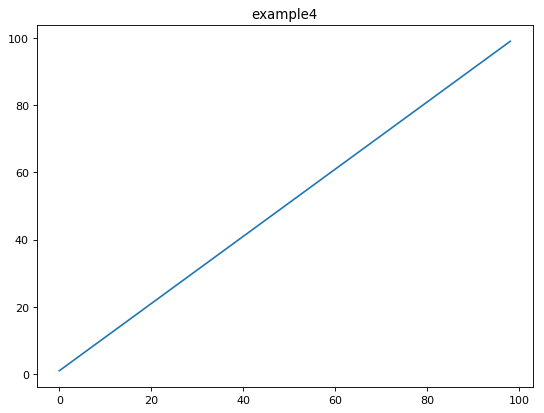

In [8]:
get_time_complexity_1(100, example4)

###### `example5`的时间复杂度为$O(n^3)$

对于`example5`我们另外定义一个可视化函数:

In [9]:
def get_time_complexity_2(n=100):
    op_nums = []
    for i in range(1, n):
        A = np.random.randint(0, 100, size=(i, ))
        B = np.random.randint(0, 100, size=(i, ))
        _, num_calc = example5(A, B)
        op_nums.append(num_calc)
    fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(op_nums)
    plt.plot(range(n), [i**2 for i in range(n)])
    plt.plot(range(n), [i**3 for i in range(n)])
    plt.legend(['example5', '$n^2$', '$n^3$'])
    plt.title('example5')
    plt.show()

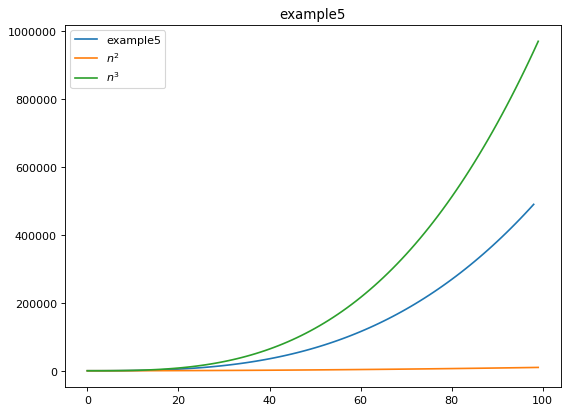

In [10]:
get_time_complexity_2()

##### R-3.32 
Given an n-element sequence S, Algorithm D calls Algorithm E on each
element S[i]. Algorithm E runs in O(i) time when it is called on element
S[i]. What is the worst-case running time of Algorithm D?

$$0+1+2+ \cdots + n-1 = \frac{n(n-1)}{2} => O(n^2)$$

##### R-3.33
Al and Bob are arguing about their algorithms. Al claims his $O(n \log n)$-
time method is always faster than Bob’s $O(n^2)$-time method. To settle the
issue, they perform a set of experiments. To Al’s dismay, they find that if
$n < 100$, the $O(n^2 )$-time algorithm runs faster, and only when $n ≥ 100$ is
the $O(n log n)$-time one better. Explain how this is possible.

solution: Consider about the constant factor!

##### R-3.34
There is a well-known city (which will go nameless here) whose inhabi-
tants have the reputation of enjoying a meal only if that meal is the best
they have ever experienced in their life. Otherwise, they hate it. Assum-
ing meal quality is distributed uniformly across a person’s life, describe
the expected number of times inhabitants of this city are happy with their
meals?

>hint: Recall the definition of the Harmonic number, $H_n$

solution:
$$H_n = 1 + \frac{1}{2} + \cdots + \frac{1}{n} => O(\log n)$$

#### Creativity

##### C-3.35 
Assuming it is possible to sort n numbers in $O(n \log n)$ time, show that it
is possible to solve the three-way set disjointness problem in $O(n \log n)$
time

In [11]:
def disjoint(a: List[Num], b: List[Num], c: List[Num]) -> bool:
    all_nums = sorted(a + b + c)
    for i in range(2, len(all_nums)):
        if all_nums[i] == all_nums[i-1] == all_nums[i-2]:
            return False
    return True

In [12]:
disjoint([1, 2], [3, 4], [5, 6])

True

In [13]:
disjoint([1, 2], [2, 4], [2, 6])

False

基本思路就是： 合并，排序，搜索。

##### C-3.36
Describe an efficient algorithm for finding the ten largest elements in a
sequence of size n. What is the running time of your algorithm?

###### 排序后切分$O(n\log n)$

In [14]:
def max_ten_1(nums: List[Num]) -> List[Num]:
    return sorted(nums)[-10:]

In [15]:
max_ten_1(range(100))

[90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

###### 替换$O(n)$

注意因为`10`是一个`constant`，所以对其进行排序等操作的复杂度都是$O(1)$

In [16]:
def max_ten_2(nums: List[Num]) -> List[Num]:
    result = sorted(nums[:10])
    for i in range(10, len(nums)):
        if nums[i] > result[0]:
            result[0] = nums[i]
            result = sorted(result)
    return result

In [17]:
max_ten_2(range(100))

[90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

##### C-3.41
Describe an algorithm for finding both the minimum and maximum of n
numbers using fewer than 3n/2 comparisons. (Hint: First, construct a
group of candidate minimums and a group of candidate maximums.)

参考[stackoverflow](https://stackoverflow.com/questions/13544476/how-to-find-max-and-min-in-array-using-minimum-comparisons),注意对最后一个元素的考虑。

In [18]:
def min_max(nums: List[Num]) -> List[Num]:
    min_num = math.inf
    max_num = -math.inf
    for i in range(1, len(nums), 2):
        if nums[i] >= nums[i-1]:
            min_num = min(min_num, nums[i-1])
            max_num = max(max_num, nums[i])
        else:
            min_num = min(min_num, nums[i])
            max_num = max(max_num, nums[i-1])
    # when len(nums) is odd
    # we have to handle the last element
    min_num = min(min_num, nums[-1])
    max_num = max(max_num, nums[-1])
    return [min_num, max_num]

In [19]:
min_max([1, 2, 3, 2, 1])

[1, 3]

##### C-3.42
Bob built a Web site and gave the URL only to his n friends, which he
numbered from 1 to n. He told friend number i that he/she can visit the
Web site at most i times. Now Bob has a counter, C, keeping track of the
total number of visits to the site (but not the identities of who visits). What
is the minimum value for C such that Bob can know that one of his friends
has visited his/her maximum allowed number of times?

考虑每个人都未达到最大访问量时，总体访问量的最大值。由于$i=1, 2, \cdots, n$, 所以未达到最大访问量时，每个人最多访问的次数依次为$j = 0, 1, \cdots, (n-1)$， 将`j`加总得$\frac{n(n-1)}{2}$, 所以当总的访问量$C=1 + \frac{n(n-1)}{2}$时，可以断定至少有一个人达到了最大访问量。

##### C-3.45 
A sequence S contains n − 1 unique integers in the range [0, n − 1], that
is, there is one number from this range that is not in S. Design an $O(n)$-
time algorithm for finding that number. You are only allowed to use $O(1)$
additional space besides the sequence S itself.

In [20]:
def find_miss(nums: List[Num]) -> Num:
    # (n-1) -> m
    m = len(nums)
    total = 0
    for i in range(m):
        total += nums[i]
    return m*(m + 1) // 2 - total

In [21]:
find_miss([0, 1, 2, 4])

3

##### C-3.53
An evil king has n bottles of wine, and a spy has just poisoned one of
them. Unfortunately, they do not know which one it is. The poison is very
deadly; just one drop diluted even a billion to one will still kill. Even so,
it takes a full month for the poison to take effect. Design a scheme for
determining exactly which one of the wine bottles was poisoned in just
one month’s time while expending $O(log n)$ taste testers.

In [22]:
def get_plan(n):
    person_num = len(str(bin(n))) - 2
    for i in range(1, n+1):
        print(str(bin(i))[2:].rjust(person_num, '0'))

In [23]:
get_plan(20)

00001
00010
00011
00100
00101
00110
00111
01000
01001
01010
01011
01100
01101
01110
01111
10000
10001
10010
10011
10100


我们对所有n个瓶子，从1开始进行标号，同时将每个标号转化为二进制的数字串。如上例，此时n=20，对应的二进制数字如上。此时，我们只需要5个人即可完成验证。具体方式是，上述第一个人，在第一列的20个数字中，如果是1，则喝掉对应瓶子的酒；如果是0，则不喝。后面四个人以此类推。那么观察5个人的存活情况，若仅有第1，3个人死亡，那么对应的编号就是`10100`,也就是第20个瓶子里面被下了毒。

##### C-3.54
A sequence S contains n integers taken from the interval [0, 4n], with repe-
titions allowed. Describe an efficient algorithm for determining an integer
value k that occurs the most often in S. What is the running time of your
algorithm?

In [24]:
def get_most_freq_num(nums: List[int]) -> int:
    records = [0] * (4 * len(nums))
    for num in nums:
        records[num] += 1
    max_time = records[0]
    max_num = nums[0]
    for num, time in enumerate(records):
        if time > max_time:
            max_time = time
            max_num = num
    return max_num

In [25]:
get_most_freq_num([1, 2, 2, 3, 4, 4, 4, 5])

4